In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the data
bank_df=pd.read_csv('bank_csv.csv')

In [4]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
#data quick checks
bank_df.size

76857

In [6]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
bank_df.shape

(4521, 17)

In [8]:
#check null values
bank_df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
#seperate categorical and numerical columns
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
bank_df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [17]:
categorical_columns=bank_df.select_dtypes(include='object').columns

In [18]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [15]:
bank_df.select_dtypes(exclude='object')

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [19]:
numerical_columns=bank_df.select_dtypes(exclude='object').columns

In [20]:
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [22]:
#categorical analysis of 'education' column
new_df=bank_df['education'].value_counts()

In [23]:
new_df

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [24]:
keys=new_df.keys()

In [25]:
keys

Index(['secondary', 'tertiary', 'primary', 'unknown'], dtype='object', name='education')

In [26]:
values=new_df.values

In [27]:
values

array([2306, 1350,  678,  187], dtype=int64)

In [29]:
df=pd.DataFrame(zip(keys,values),columns=['education','counts'])

In [30]:
df

,education,counts
0,secondary,2306
1,tertiary,1350
2,primary,678
3,unknown,187


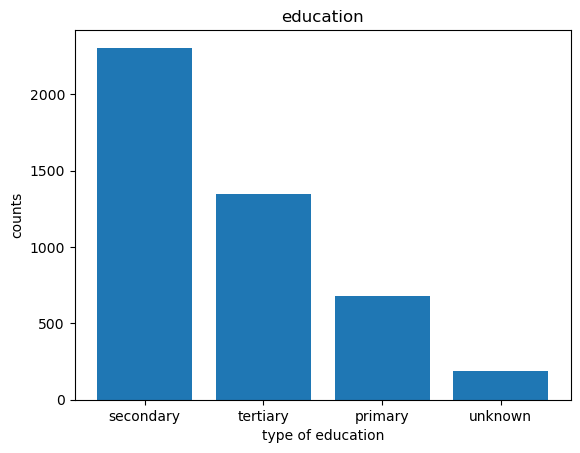

In [38]:
#visualization of categorical analysis
plt.bar(keys,values,data=df)
plt.title('education')
plt.xlabel('type of education')
plt.ylabel('counts')
plt.show()

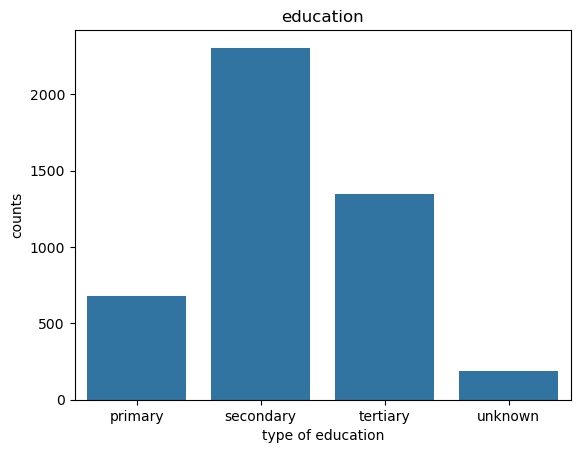

In [39]:
sns.countplot(x='education',data=bank_df)
plt.title('education')
plt.xlabel('type of education')
plt.ylabel('counts')
plt.show()

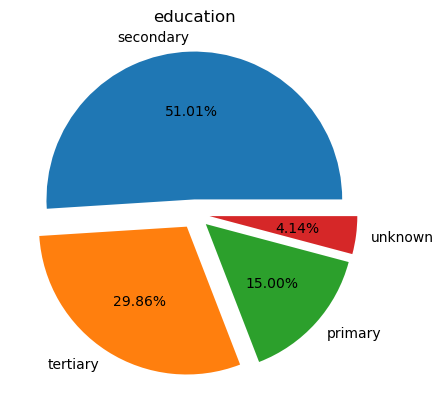

In [45]:
plt.pie(values,labels=keys,explode=[0.1,0.1,0.1,0.1],autopct="%0.2f%%")
plt.title('education')
plt.show()

In [57]:
bank_df=pd.read_csv('bank_csv.csv')
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [58]:
bank_df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [59]:
cols=bank_df.select_dtypes(include='object').columns
for i in cols:
 labels=list(bank_df[i].unique())
 values=[i for i in range(len(labels))]
 d=dict(zip(labels,values))
 bank_df[i]=bank_df[i].map(d)
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,0,0,1787,0,0,0,19,0,79,1,-1,0,0,0
1,33,1,0,1,0,4789,1,1,0,11,1,220,1,339,4,1,0
2,35,2,1,2,0,1350,1,0,0,16,2,185,1,330,1,1,0
3,30,2,0,2,0,1476,1,1,1,3,3,199,4,-1,0,0,0
4,59,3,0,1,0,0,1,0,1,5,1,226,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,30,7,329,5,-1,0,0,0
4517,57,4,0,2,1,-3313,1,1,1,9,1,153,1,-1,0,0,0
4518,57,5,0,1,0,295,0,0,0,19,5,151,11,-1,0,0,0
4519,28,3,0,1,0,1137,0,0,0,6,4,129,4,211,3,2,0


In [60]:
bank_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.095775,0.498120,1.231365,0.016810,1422.657819,0.566025,0.152842,0.426012,15.915284,3.926123,263.961292,2.793630,39.766645,0.542579,0.281132,0.115240
std,10.576211,2.602310,0.695471,0.748744,0.128575,3009.638142,0.495676,0.359875,0.614626,8.247667,2.717826,259.856633,3.109807,100.121124,1.693562,0.678637,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,1.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,3.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,1.000000,21.000000,7.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


<Axes: xlabel='education', ylabel='Count'>

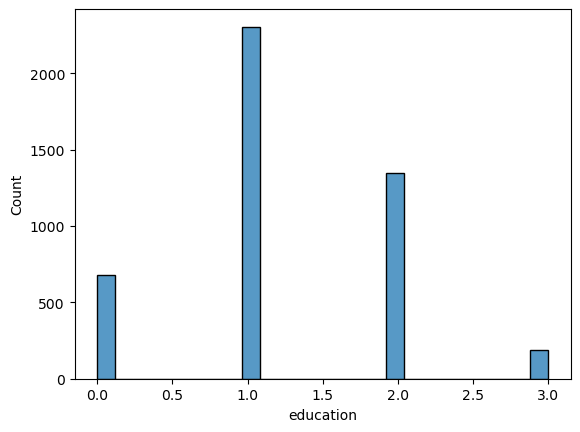

In [62]:
sns.histplot(bank_df['education'])

In [64]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='education', ylabel='Density'>

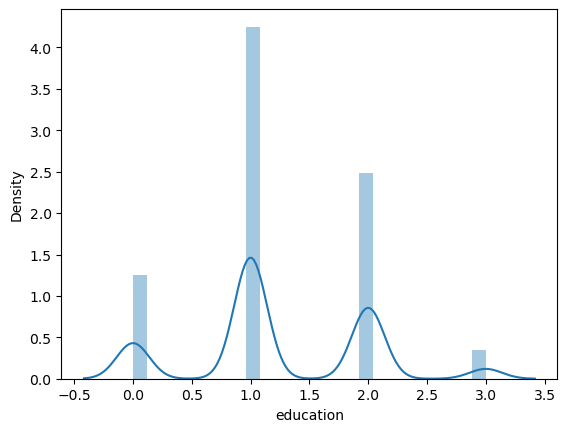

In [65]:
sns.distplot(bank_df['education'])

<Axes: xlabel='education'>

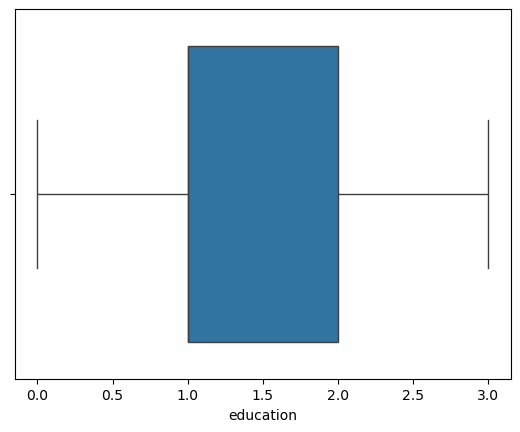

In [67]:
#outlier analysis
sns.boxplot(x='education',data=bank_df)

In [71]:
q1=np.percentile(bank_df['education'],25)
q1

1.0

In [72]:
q3=np.percentile(bank_df['education'],75)
q3

2.0

In [73]:
iqr=q3-q1
iqr

1.0

In [78]:
lb=q1-1.5*iqr
lb

-0.5

In [79]:
ub=q3+1.5*iqr

In [80]:
ub

3.5

In [99]:
con1=bank_df['education']<lb


In [100]:
con2=bank_df['education']>ub

In [91]:
non_outliers=bank_df[con1|con2]

In [93]:
len(non_outliers)

0

In [94]:
outliers_data=bank_df[con1&con2]

In [95]:
len(outliers_data)

0

<Axes: >

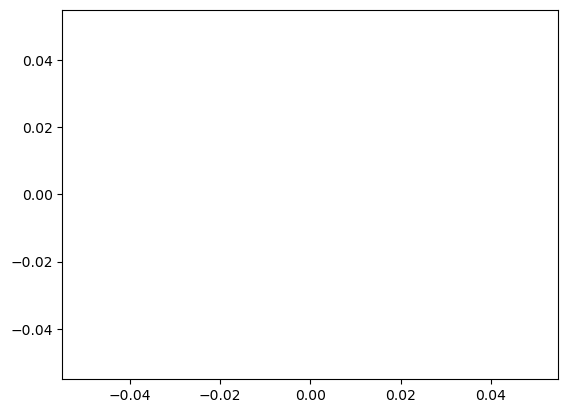

In [98]:
#for non otliers data.histplot(non_outliers['education'])
sns.histplot(non_outliers['education'])

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bank_df[numerical_columns])

In [104]:
df_scaled

array([[-1.05626965,  0.12107186,  0.37405206, ..., -0.57682947,
        -0.4072183 , -0.32041282],
       [-0.77258281,  1.1186443 , -0.59602646, ..., -0.57682947,
         2.98904408,  2.04173372],
       [-0.58345826, -0.02414438,  0.01027262, ..., -0.57682947,
         2.89914302,  0.27012381],
       ...,
       [ 1.49691189, -0.37472364,  0.37405206, ...,  2.63916021,
        -0.4072183 , -0.32041282],
       [-1.24539421, -0.09492484, -1.20232553, ...,  0.38796743,
         1.71045119,  1.45119709],
       [ 0.26760226, -0.09525714, -1.56610497, ..., -0.2552305 ,
         2.09003345,  3.81334363]])